# The impact of news on Bitcoin price variation

This analysis **(a work in progress)** is an attempt to find a corollation between bitcoin related news and the rise or fall of the bitcoin exchange rate (BTC/USD).

###DATA
####Get the Bitcoin Data
Download all the bitcoin price historical data. This can be found in http://api.bitcoincharts.com/v1/csv/
In order to get all the available data from all markets, execute the following:

    wget -A csv.gz -r -l 1 -nd http://api.bitcoincharts.com/v1/csv/
    
From this entire bitcoincharts repo, the most comprehensive catalog of data is `btceUSD.csv`.

An alternative source of data is Quandl : https://www.quandl.com/c/markets/bitcoin-data

####Unzip the package

    $: gunzip btceUSD.csv.gz




In [2]:
# Import the necessary shit
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates

# Enable inline plotting
%matplotlib inline

In [3]:
# Loading the Bitcoin price data
# Format:
# EPOCH_TIMESTAMP, PRICE_VALUE, NO_FUCKING_CLUE
data_location = r'_raw_data/b7USD.csv'
# reading the CSV file while specifying headers (with the param names), 
# because there aren't any in those csv files
raw_data = pd.read_csv(data_location, names=['TimeStamp', 'Price', 'RandV'])

In [4]:
raw_data.count()

TimeStamp    5492
Price        5492
RandV        5492
dtype: int64

In [5]:
# Add a new column DateTime that contains
# formatted date/time based on the Epoch 
# TimeStamp provided in the data set
# raw_data['DateTime'] = raw_data['TimeStamp'].apply(lambda x: time.strftime('%d-%m-%Y %H:%M:%S',  time.gmtime(x)))

# Another more efficient way of doing the 
# Timestamp to formatted date conversion
# unit='s' is to specify that the timestamp 
# was stored with the seconds unit
raw_data['DateTime'] = pd.to_datetime(raw_data['TimeStamp'], unit='s')

In [17]:
# Creating a DataFrame from the raw data
df1 = pd.DataFrame(raw_data, columns=['DateTime', 'Price'])

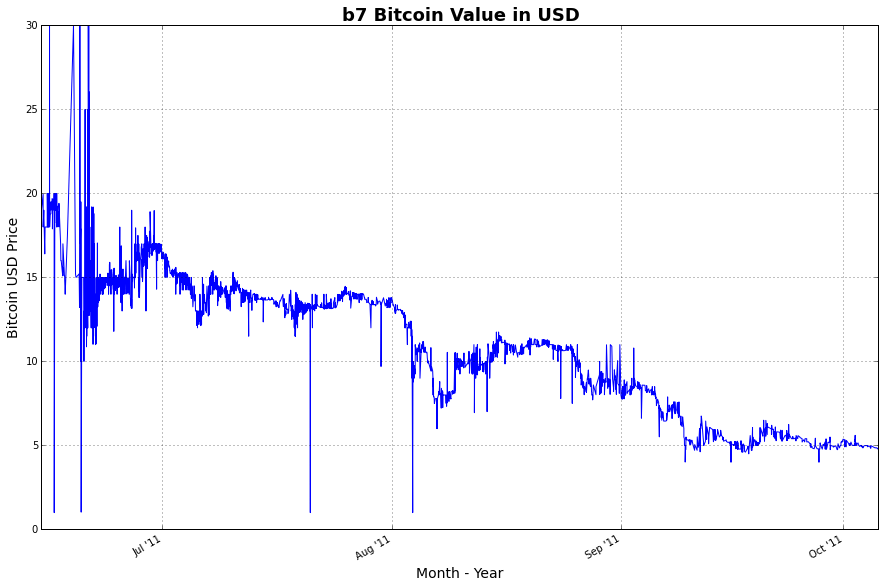

In [16]:
# Defining the plot
# and its properties
out_fig = plt.figure()

# plot properties
a = df1.plot(x='DateTime', y='Price', figsize=(15,10))
a.xaxis.set_major_locator(dates.MonthLocator(bymonth=range(1,13), bymonthday=1, interval=1))
a.xaxis.set_major_formatter(dates.DateFormatter("%b '%y"))


# Layout
a.set_title("b7 Bitcoin Value in USD", weight="bold", size=18)
a.set_xlabel("Month - Year", size=14)
a.set_ylabel('Bitcoin USD Price', size=14)